In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the generated dataset

df = pd.read_csv('Work_weekday.csv')



In [111]:

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
    DeviceName   Time     Timestamp Activity  RoomName PowerStatus  Day  Hour  \
0       Lights  06:00 -2.208986e+09  AwakeUp   Bedroom          On    1     6   
1  SmartBlinds  06:00 -2.208986e+09  AwakeUp   Bedroom        Open    1     6   
2       Lights  06:05 -2.208986e+09  Bathing  Bathroom          On    1     6   
3  WaterHeater  06:07 -2.208986e+09  Bathing  Bathroom          On    1     6   
4  SmartBlinds  06:07 -2.208986e+09  Bathing  Bathroom       Close    1     6   

   Minute  
0       0  
1       0  
2       5  
3       7  
4       7  


In [112]:
df.columns

Index(['DeviceName', 'Time', 'Timestamp', 'Activity', 'RoomName',
       'PowerStatus', 'Day', 'Hour', 'Minute'],
      dtype='object')

In [113]:

# Summary statistics of numerical columns
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
          Timestamp         Day        Hour      Minute
count  9.600000e+02  960.000000  960.000000  960.000000
mean  -2.208977e+09    3.000000    8.240625   25.375000
std    8.304104e+03    1.414951    2.357827   16.982571
min   -2.208986e+09    1.000000    6.000000    0.000000
25%   -2.208984e+09    2.000000    6.000000   12.000000
50%   -2.208981e+09    3.000000    7.000000   26.000000
75%   -2.208968e+09    4.000000   11.000000   40.000000
max   -2.208962e+09    5.000000   12.000000   59.000000


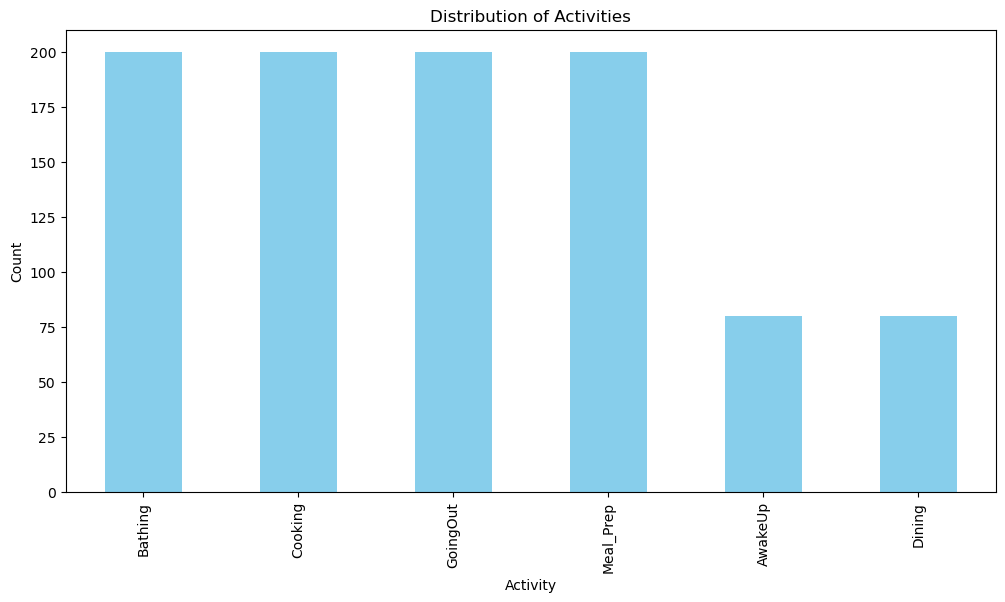

In [114]:

# Distribution of activities
plt.figure(figsize=(12, 6))
df['Activity'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


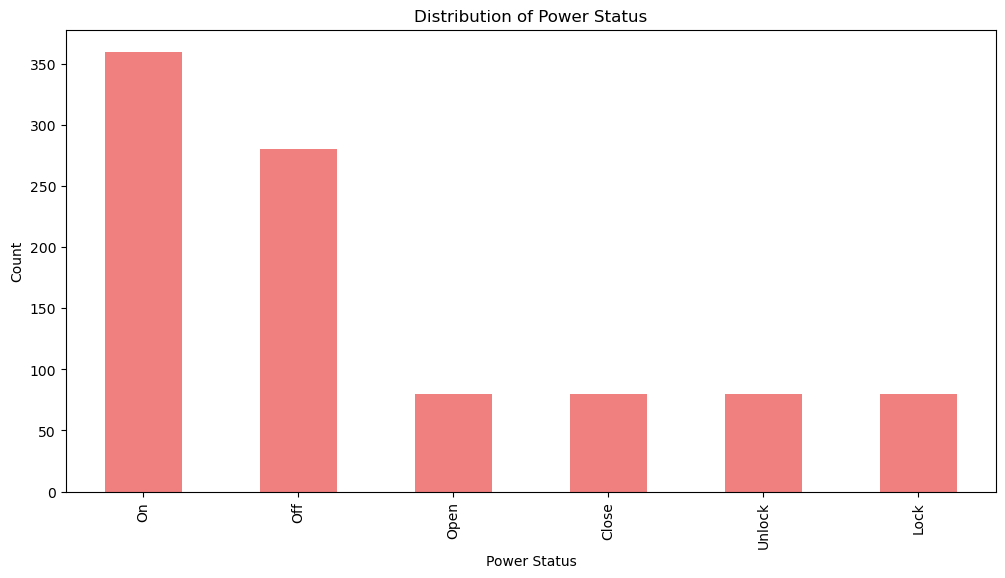

In [115]:

# Distribution of power status
plt.figure(figsize=(12, 6))
df['PowerStatus'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Power Status')
plt.xlabel('Power Status')
plt.ylabel('Count')
plt.show()


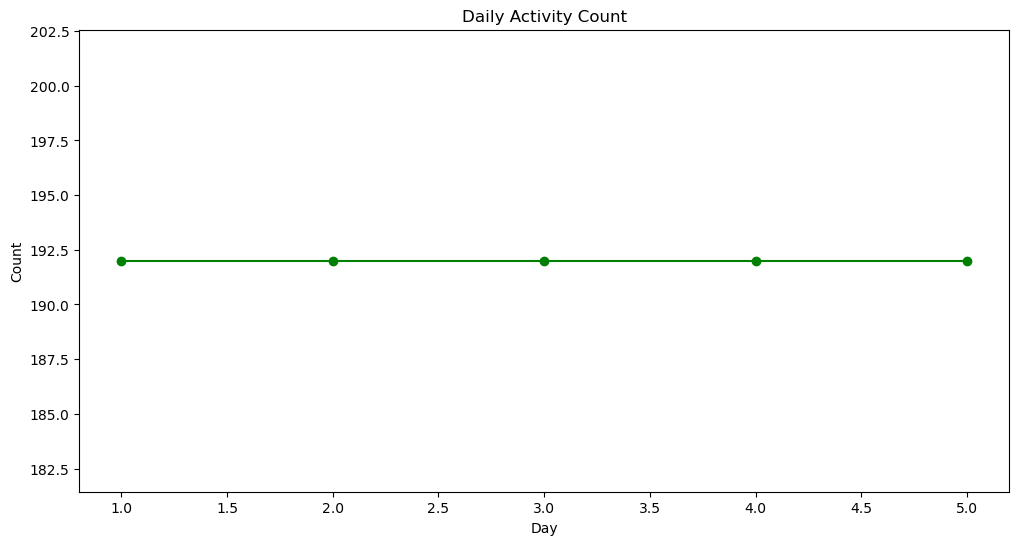

In [116]:

# Daily activity count
daily_activity_count = df.groupby('Day')['Activity'].count()
plt.figure(figsize=(12, 6))
daily_activity_count.plot(kind='line', marker='o', color='green')
plt.title('Daily Activity Count')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()


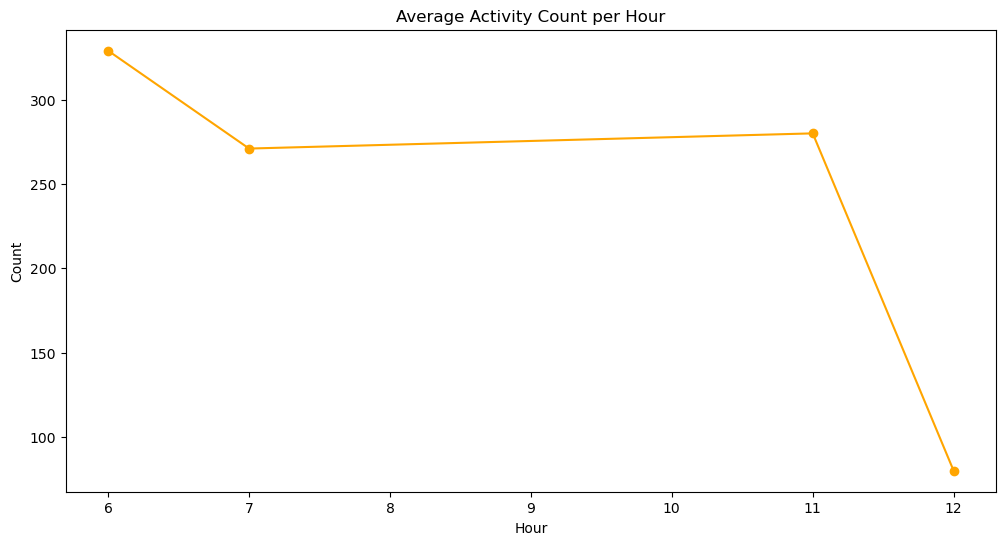

In [117]:

# Average activity count per hour
hourly_activity_count = df.groupby('Hour')['Activity'].count()
plt.figure(figsize=(12, 6))
hourly_activity_count.plot(kind='line', marker='o', color='orange')
plt.title('Average Activity Count per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')


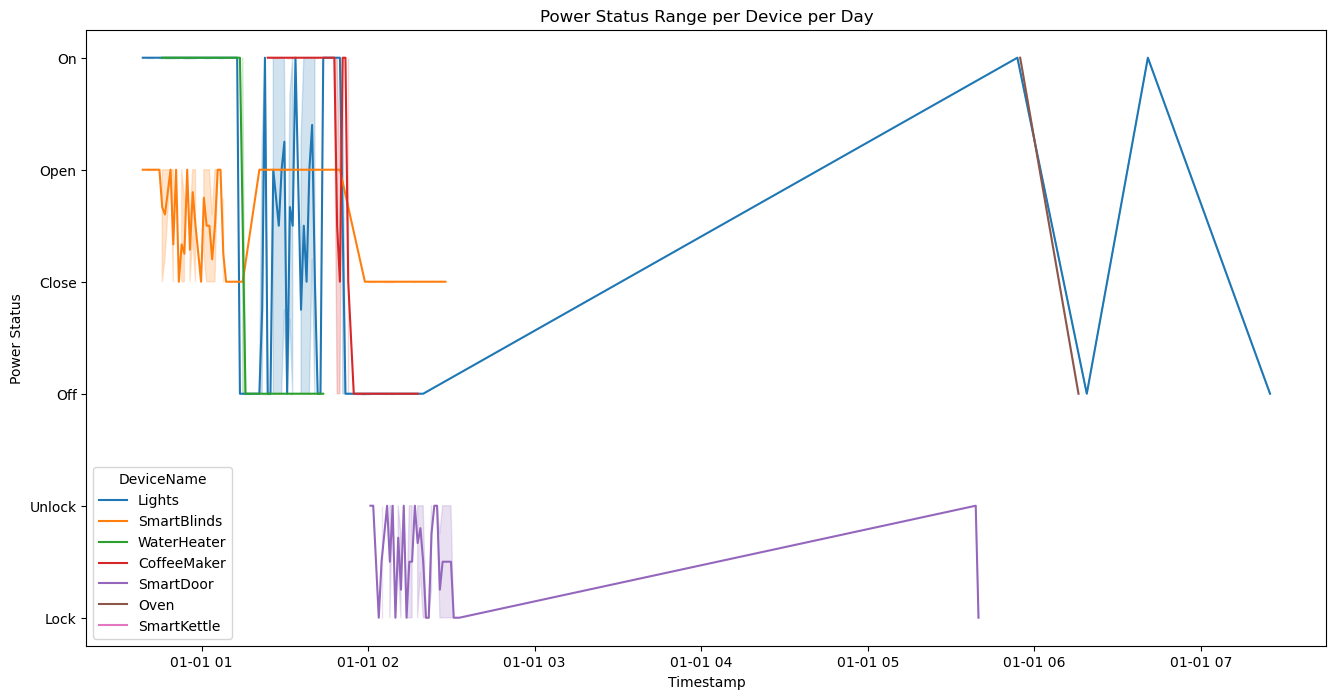

In [119]:

# Plotting the range of power status for each device per day
plt.figure(figsize=(16, 8))
sns.lineplot(x='Timestamp', y='PowerStatus', hue='DeviceName', data=df)
plt.title('Power Status Range per Device per Day')
plt.xlabel('Timestamp')
plt.ylabel('Power Status')
plt.show()


0: 'Open'
1: 'Close'
2: 'On'
3: 'Off'
4: 'Unlock'
5: 'Lock'

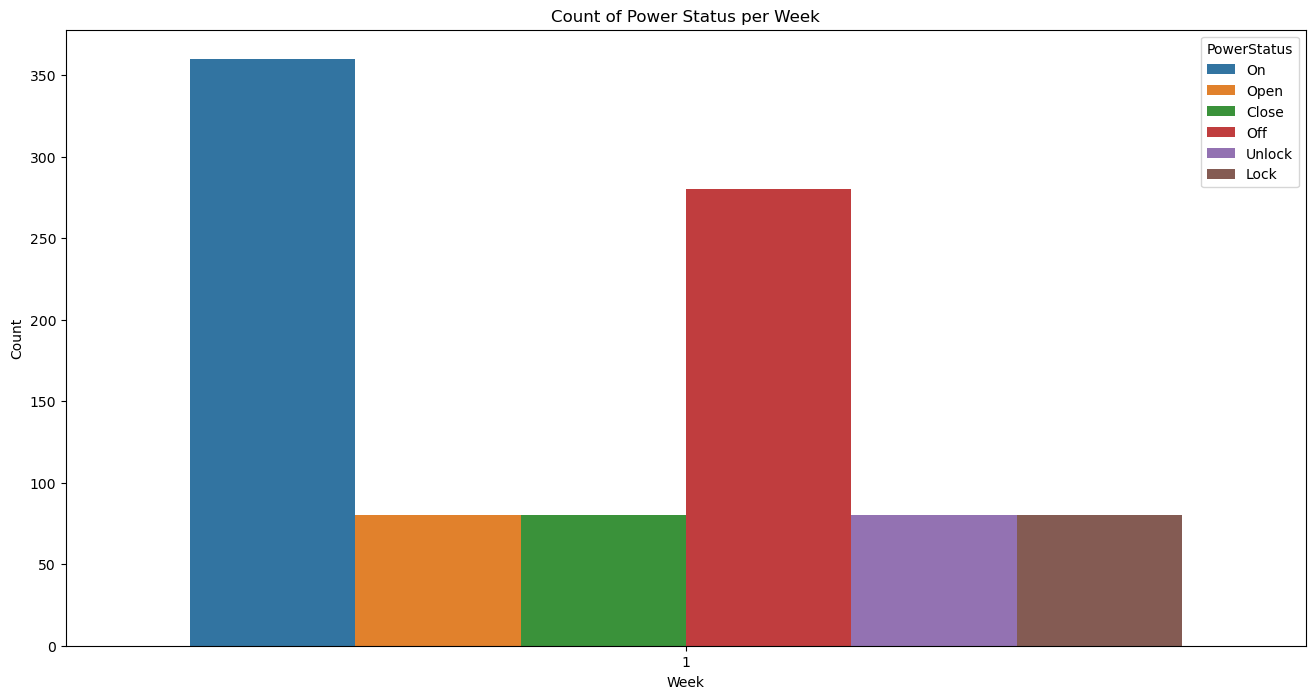

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Extract week information from Timestamp
df['Week'] = df['Timestamp'].dt.isocalendar().week

# Create a count plot to visualize the power status per week
plt.figure(figsize=(16, 8))
sns.countplot(x='Week', hue='PowerStatus', data=df)
plt.title('Count of Power Status per Week')
plt.xlabel('Week')
plt.ylabel('Count')
plt.show()


In [133]:
print(df.columns)


Index(['DeviceName', 'Activity', 'RoomName', 'PowerStatus', 'Day', 'Hour',
       'Minute', 'Week'],
      dtype='object')


In [150]:
df.head(25)

,DeviceName,Activity,RoomName,PowerStatus,Day,Hour,Minute,Week
0,Lights,AwakeUp,Bedroom,3,1,0,38,1
1,SmartBlinds,AwakeUp,Bedroom,4,1,0,38,1
2,Lights,Bathing,Bathroom,3,1,0,43,1
3,WaterHeater,Bathing,Bathroom,3,1,0,45,1
4,SmartBlinds,Bathing,Bathroom,0,1,0,45,1
5,Lights,Bathing,Bathroom,2,1,1,13,1
6,WaterHeater,Bathing,Bathroom,2,1,1,14,1
7,SmartBlinds,Cooking,LivingRoom,4,1,1,20,1
8,Lights,Cooking,LivingRoom,3,1,1,21,1
9,CoffeeMaker,Cooking,Kitchen,3,1,1,23,1


In [155]:
import pandas as pd

# Function to recommend devices based on input parameters
def recommend_devices(hour, minute, room_name):
    # Filter the DataFrame for the specified room_name
    room_df = df[df['RoomName'] == room_name]
    
    # Calculate the hour range to check
    hour_range_start = hour - 1
    hour_range_end = hour + 1
    
    # Filter the DataFrame for the specified hour range and minute
    hour_range_df = room_df[((room_df['Hour'] == hour_range_start) & (room_df['Minute'] >= minute)) |
                             ((room_df['Hour'] == hour_range_end) & (room_df['Minute'] <= minute)) |
                             ((room_df['Hour'] > hour_range_start) & (room_df['Hour'] < hour_range_end))]
    
    # Get the list of unique devices used in the specified room within the hour range
    recommended_devices = hour_range_df['DeviceName'].unique().tolist()
    
    if recommended_devices:
        return recommended_devices
    else:
        print("There is not enough pattern matching the input.")
        return []

# Passing sample inputs
hour_input = 6
minute_input = 30
room_name_input = 'LivingRoom'

recommended_devices = recommend_devices(hour_input, minute_input, room_name_input)
if recommended_devices:
    print(f'Recommended Devices: {recommended_devices}')


Recommended Devices: ['SmartDoor']


In [156]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity


# Calculate device frequency in each room
room_device_counts = df.groupby(['RoomName', 'DeviceName']).size().reset_index(name='Frequency')

# Pivot the table to have RoomName as rows and DeviceName as columns
room_device_matrix = room_device_counts.pivot(index='RoomName', columns='DeviceName', values='Frequency').fillna(0)

# Apply one-hot encoding to the room-device matrix
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), room_device_matrix.columns)],
    remainder='passthrough')

room_device_matrix_enc = preprocessor.fit_transform(room_device_matrix)

# Calculate cosine similarity between rooms
room_similarity_matrix = cosine_similarity(room_device_matrix_enc)

def recommend_devices(room_name):
    # Find the index of the given room
    room_index = room_device_matrix.index.get_loc(room_name)
    
    # Find the rooms with highest similarity to the given room
    similar_rooms = room_similarity_matrix[room_index].argsort()[::-1][1:]  # Exclude the given room
    
    # Get the most frequently used devices in similar rooms
    recommended_devices = room_device_matrix.iloc[similar_rooms].sum().sort_values(ascending=False)
    
    if recommended_devices.empty:
        print("There is not enough pattern matching the input.")
    else:
        return recommended_devices.index.tolist()

# Example Usage
room_name_input = 'LivingRoom'
recommended_devices = recommend_devices(room_name_input)
print(f'Recommended Devices for {room_name_input}: {recommended_devices}')


Recommended Devices for LivingRoom: ['Lights', 'CoffeeMaker', 'Oven', 'SmartBlinds', 'WaterHeater', 'SmartKettle', 'SmartDoor']


In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'df' with columns: 'DeviceName', 'Time', 'RoomName', 'PowerStatus', 'Day', 'Hour', 'Minute'

# Split the data into features (X) and target variable (y)
X = df[['Time', 'RoomName', 'PowerStatus', 'Day', 'Hour', 'Minute']].copy()
y = df['DeviceName']

# Convert time to datetime and extract hour and minute
X['Time'] = pd.to_datetime(X['Time'])
X['Hour'] = X['Time'].dt.hour
X['Minute'] = X['Time'].dt.minute

# Drop the original 'Time' column
X.drop('Time', axis=1, inplace=True)

# Map categorical variables to numerical values
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Model Accuracy: 79.17%


/var/folders/lw/g087237n54g8x22r96w6r4tc0000gn/T/ipykernel_1368/1791919595.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['Time'] = pd.to_datetime(X['Time'])
